In [1]:
import os

import numpy as np # arrays
import pandas as pd # dataframes
pd.set_option('display.float_format','{:.2f}'.format) # display floats option
import geopandas as gpd # geo dataframes
from tqdm.notebook import tqdm # progress bar
tqdm.pandas()

import matplotlib.pyplot as plt

# Case Study: How Does a Bike-Share Navigate Speedy Success?
<img src="logo.png" width="200" height="200">

### Introduction

In 2016, <font color=blue>Cyclistic</font> launched a successful bike-share offering. 
Bicycles are geotracked and locked into a network of stations across Chicago. 
The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. 
<span style='background:yellow'>Customers who purchase single-ride or full-day passes</span> are referred to as <font color=blue>casual</font> riders. 
<span style='background:yellow'>Customers who purchase annual memberships</span> are Cyclistic <font color=blue>members</font>.

Cyclistic’s <font color=blue>finance analysts</font> have concluded that annual members are much more profitable than casual riders. 
Although the pricing flexibility helps Cyclistic attract more customers, <font color=blue>Moreno</font> believes that maximizing the number of annual members will be key to future growth. 
Rather than creatinga marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. 
She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: **Design marketing strategies aimed at converting casual riders into annual members**. 
In order to do that, however, the marketing analyst team needs to better understand 

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

Moreno and her team are interested in analyzing the Cyclistic <span style='background:yellow'>historical bike trip data</span> to identify trends.
Here, we focus on the first question:

**How do annual members and casual riders use Cyclistic bikes differently?**

We are tasked to produce <font color=red>within a week</font> a report with the following deliverables:

<input type="checkbox" disabled  /> A clear statement of the business task

<input type="checkbox" disabled  /> A description of all data sources used

<input type="checkbox" disabled  /> Documentation of any cleaning or manipulation of data

<input type="checkbox" disabled  /> A summary of your analysis

<input type="checkbox" disabled  /> Supporting visualizations and key findings

<input type="checkbox" disabled  /> Your top three recommendations based on your analysis


## 1. Ask Phase

The ultimate **business goal** is to <u>convert casual riders into annual members</u>. To this end, we

* Derive usage <span style='background:yellow'>differences between casual riders and annual members from historical data of bike trips</span>

Subsequently, we share these insights with the marketing analytics team to find

* How knowing these differences might help us convert casual riders into annual members?

Finally, these insights are used to develop a marketing strategy to be presented to and approved by the executive team.

<input type="checkbox" disabled  checked/> A clear statement of the business task

## 2. Prepare Phase

### Import Data

The data to explore how different customer types are using Cyclistic bikes can be found under this [link](https://divvy-tripdata.s3.amazonaws.com/index.html). 
The data is public and has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). 
Users' sensitive data has been excluded from the data.
The data has been (presumably) processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

In the following, we import <span style='background:yellow'>historical trip data for the year 2022</span>. 

<u>Remark</u>: The data for each month was split into parts that do not exceed 25 MB size (see 'split.py') to conform with GitHub restrictions.

In [2]:
csv_files = [f'2022{month+1:02d}-divvy-tripdata' for month in range(12)] # csv files
all_files = os.listdir('./data') # all files in current directory

container = [] # container for month dataframes
for csv in csv_files:
    parts = [f'./data/{x}' for x in all_files if x.startswith(f'{csv}_part')] # csv chunks
    df = pd.concat(map(pd.read_csv, parts), ignore_index=True) # month csv
    container.append(df) # update container
df = pd.concat(container, ignore_index=True) # merge all months into a single dataframe

### First glimpse

In [3]:
m, n = df.shape
print(f'Number of rows: {m} and columns: {n}')
print(df.dtypes)
df.head(5)

Number of rows: 5667717 and columns: 13
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01,-87.67,42.01,-87.67,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.93,-87.65,41.93,-87.67,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98,-87.67,41.96,-87.67,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.88,-87.62,41.88,-87.63,member


In [4]:
unique_bikes = df['rideable_type'].unique()
print(f'Unique bike types: {unique_bikes}')
unique_users = df['member_casual'].unique()
print(f'Unique user types: {unique_users}')

Unique bike types: ['electric_bike' 'classic_bike' 'docked_bike']
Unique user types: ['casual' 'member']


### First insights

Each ride has a unique identifier, the <font color=blue>ride_id</font>. 
It is known <font color=blue>when</font> and <font color=blue>where</font> the ride has started and ended. 
Furthermore, we know the <font color=blue>type of bike</font> (electric vs classic vs docked) being used as well as the <font color=blue>rider type</font> (member vs casual).

* <font color=blue>ride_id</font>: 16-characters-long ride identifier (consistent?)
* <font color=blue>rideable_type</font>: 'electric_bike' or 'classic_bike' or 'docked_bike'. What does docked mean?
* <font color=blue>started_at, ended_at</font>: convert strings to datetime format! sort data chronologically (by started_at)!
* <font color=blue>start_station_name || start_station_id || start_lat, start_lng</font>: start station ids (consistent?)
* <font color=blue>end_station_name || end_station_id || end_lat, end_lng</font>: end station ids (consistent?)
* <font color=blue>member_casual</font>: 'casual' or 'member'

### Duplicates & Nulls

In [5]:
count_dups = df.duplicated().values.sum()
print(f'Number of duplicated rows: {count_dups}')

Number of duplicated rows: 0


In [6]:
df = df.replace(['NaN', 'None', ''], np.nan)
count_nulls = df.isnull().sum()
count_nulls

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

#### comment:

There are no duplicates. 
A considerable portion of rides ($\sim 15\%$) are missing <font color=blue>station_name</font> and <font color=blue>station_id</font> even though the <span style='background:yellow'>geo location</span> (<font color=blue>lat</font> and <font color=blue>lng</font>) is almost always availible. 
We presume that in the recent year, 2022, docking a bike at a station was not necessary to end a ride. 
Thus, a ride could be ended or started at any geo location without a corresponding station. 
A failed registration of a docking station might also be an option but a number that high is rather unlikely.
For some rides ($\sim 0.1\%$), there is no information availible regarding the end geo location (malfunctioning?).


* The data is <font color=red>not yet reliable</font> and some cleaning might be required
* The data is <font color=red>original</font>, since it has been collected by Cyclistic itself (first-party)
* The data is <font color=red>comprehensive</font> and contains the crucial feature <font color=blue>'member_casual'</font> to answer one of our business questions
* The data is <font color=red>current</font>, since it contains info about the previous year
* The data is <font color=red>cited</font> and has been promoted by google and is availible at kaggle

<input type="checkbox" disabled  checked/> A description of all data sources used

## 3. Process Phase

In [7]:
df_backup = df.copy() # create a backup

### 3.1 ride_id

check consistency

In [8]:
ids_len = df['ride_id'].apply(len)
print(f'How many ride_ids deviate from 16 characters? Answer: {(ids_len != 16).sum()}')

How many ride_ids deviate from 16 characters? Answer: 0


### 3.2 rideable_type

what is special about docked bikes?

In [9]:
df.groupby('rideable_type')['rideable_type'].count() # counting number of rides for each type

rideable_type
classic_bike     2601214
docked_bike       177474
electric_bike    2889029
Name: rideable_type, dtype: int64

In [10]:
filt = df.columns.drop('rideable_type') # all columns except rideable type
grouped = df[filt].isnull().groupby(df['rideable_type']).sum() # count nulls for each ride type separately
grouped

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
rideable_type,,,,,,,,,,,,
classic_bike,0,0,0,0,0,3788,3788,0,0,3242,3242,0
docked_bike,0,0,0,0,0,2616,2616,0,0,2616,2616,0
electric_bike,0,0,0,833064,833064,886338,886338,0,0,0,0,0


#### <u>Assumption</u>:

* electric bikes are indeed not required to be docked at a station. Geo location is always availible for e-bikes.
* docked and classic bikes always start at a docking stations. Sometimes, the bikes are not returned (malfunctioning)?

We decide to **remove ($\sim 6000$) data entries with missing <font color=blue>end_station_id</font> values for classic and docked bikes**.

In [11]:
mask1 = df['rideable_type'].apply(lambda x: x in ['classic_bike', 'docked_bike'])
mask2 = df['end_station_id'].isnull()
df = df[-(mask1 & mask2)]

### 3.2 started_at, ended_at

* convert into datetime and sort by <font color=blue>started_at</font>
* calculate ride <font color=blue>duration</font> in minutes
* extract <font color=blue>daytime</font>(morning, evening)
* extract <font color=blue>weekday</font> (Mo,Tu,...) 
* extract <font color=blue>month</font> (Jan,Feb,...)

In [12]:
### convert into datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df = df.sort_values(by=['started_at']).reset_index(drop=True) # chronological sorting

In [13]:
### ride duration
df['duration_min'] = df['ended_at'] - df['started_at']
df['duration_min'] = df['duration_min'].dt.total_seconds() / 60 # in minutes

mask = (df['duration_min'] < 1)
print(f'There are {mask.sum()} rides with duration less than a minute.')
df = df[-mask]

mask2 = (df['duration_min'] > 60*6)
print(f'There are {mask2.sum()} rides with duration more than 6 hours.')
df = df[-mask2]

There are 121086 rides with duration less than a minute.
There are 4440 rides with duration more than 6 hours.


#### <u>Assumption</u>:

We **remove ($\sim 120.000$) data entries with <font color=blue>duration</font> less than a minute** (potentially false starts or users trying to re-dock a bike to ensure it was secure).

We **remove ($\sim 4.000$) data entries with <font color=blue>duration</font> more than 6 hours** (anything beyond is a physically extreme cycling).

In [14]:
### extract daytime
def daytime(hour):
    if (5 <= hour) and (hour < 12):
        return "morning"
    if (12 <= hour) and (hour < 17):
        return "noon"
    if (17 <= hour) and (hour < 21):
        return "evening"
    else:
        return "night"
    
df['started_at_daytime'] = df['started_at'].dt.hour.apply(daytime)

In [15]:
### extract weekday
df['started_at_weekday'] = df['started_at'].dt.day_name().str[:2]

In [16]:
### extract month
df['started_at_month'] = df['started_at'].dt.month_name().str[:3]

### 3.3 start_location, end_location

Geo location data points, lat and lng, might be grouped into several clusters algorithmically, e.g. by k-means clustering, or geographically, e.g. by assignment to community areas of Chicago, see [here](https://chicagomap360.com/chicago-neighborhood-map) and the map below. 
We decide to do the latter.

#### <u>Assumption</u>:

Station names or ids are not particularly useful for drawing insights, especially considering that e-bikes do not need to be docked in the first place. 
We decide to remove this info.

In [17]:
df = df.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])

#### Mapping geo location to community areas:

First, let us import data on geographical boundaries of community areas which can be found [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6). 
The GeoJSON file contains multipolygon objects.
To work with such objects, we require the **geopandas** library.

In [18]:
areas = gpd.read_file('chicago_areas.geojson')
areas.head(2)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."


<img src="chicago_map.png" width="500">

In [19]:
### We are only interested in geo data and the corresponding community labels
areas = areas[['geometry', 'community']]
areas.head(2)

,geometry,community
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",DOUGLAS
1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",OAKLAND


In [20]:
### convert (lng, lat)-pairs into point objects
df['start_points'] = gpd.points_from_xy(df['start_lng'], df['start_lat'])
df['end_points'] = gpd.points_from_xy(df['end_lng'], df['end_lat'])

In [21]:
### convert geo points into community labels (remark: it takes a long time to process!)
def return_area(geo_point):
    '''
    Parameters
    ----------
    geo_point : object
    

    Returns
    -------
    string : area name
    '''
    _match = areas[areas['geometry'].contains(geo_point)] # area which contains the geo point
    if _match.shape[0] == 0: # outside chicago?
        return 'OUTSIDE'
    if _match.shape[0] > 1: # ambigious point? (area border)?
        print('Ambiguity at ({geo_point}) !')
    return _match['community'].iloc[0]

df['start_area'] = df['start_points'].progress_apply(return_area)
df['end_area'] = df['end_points'].progress_apply(return_area)

  0%|          | 0/5535787 [00:00<?, ?it/s]

  0%|          | 0/5535787 [00:00<?, ?it/s]

In [22]:
### the columns below are no longer needed
df = df.drop(columns = ['start_points', 'start_lng', 'start_lat', 'end_points', 'end_lng', 'end_lat'])

#### Save cleaned data

In [23]:
df.to_csv('data_clean.csv', index=False)

<input type="checkbox" disabled  checked/> Documentation of any cleaning or manipulation of data

## 4. Analysis

### Load cleaned data

In [24]:
parts = [f'./data_clean/data_clean_part{part:02d}.csv' for part in range(30)]
df = pd.concat(map(pd.read_csv, parts), ignore_index=True)

In [25]:
m, n = df.shape
print(f'Number of rows: {m} and columns: {n}')
print(df.dtypes)
df.head(5)

Number of rows: 5535787 and columns: 11
ride_id                object
rideable_type          object
started_at             object
ended_at               object
member_casual          object
duration_min          float64
started_at_daytime     object
started_at_weekday     object
started_at_month       object
start_area             object
end_area               object
dtype: object


,ride_id,rideable_type,started_at,ended_at,member_casual,duration_min,started_at_daytime,started_at_weekday,started_at_month,start_area,end_area
0,98D355D9A9852BE9,classic_bike,2022-01-01 00:00:05,2022-01-01 00:01:48,casual,1.72,night,Sa,Jan,LOOP,LOOP
1,04706CA7F5BD25EE,electric_bike,2022-01-01 00:01:00,2022-01-01 00:04:39,casual,3.65,night,Sa,Jan,LAKE VIEW,LAKE VIEW
2,42178E850B92597A,electric_bike,2022-01-01 00:01:16,2022-01-01 00:32:14,casual,30.97,night,Sa,Jan,LOOP,LOOP
3,6B93C46E8F5B114C,classic_bike,2022-01-01 00:02:14,2022-01-01 00:31:07,casual,28.88,night,Sa,Jan,LOOP,LOOP
4,466943353EAC8022,classic_bike,2022-01-01 00:02:35,2022-01-01 00:31:04,casual,28.48,night,Sa,Jan,LOOP,LOOP


### 4.1 Bike types

How does <span style='background:yellow'>the number of rides</span> and <span style='background:yellow'>mean ride duration</span> differs between <font color=blue>members/casuals</font> for different <font color=blue>bike types</font>.

In [26]:
pivot = df.pivot_table(index='member_casual', columns='rideable_type', values='duration_min', aggfunc=['count', 'mean'])
pivot

count                                   mean              \
rideable_type classic_bike docked_bike electric_bike classic_bike docked_bike   
member_casual                                                                   
casual           874236.00   171918.00    1219408.00        23.33       43.28   
member          1682060.00         NaN    1588165.00        13.05         NaN   

                             
rideable_type electric_bike  
member_casual                
casual                16.58  
member                11.71

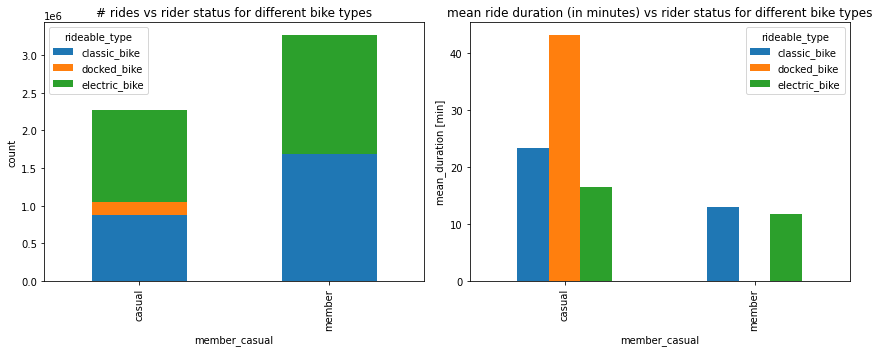

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 5)
ax1 = pivot['count'].plot.bar(stacked=True, ax=ax1)
ax2 = pivot['mean'].plot.bar(stacked=False, ax=ax2)
ax1.set_ylabel('count')
ax2.set_ylabel('mean_duration [min]')
ax1.set_title('# rides vs rider status for different bike types')
ax2.set_title('mean ride duration (in minutes) vs rider status for different bike types')
fig.tight_layout()

#### <u>Description</u>:

* Members use bikes of any type more often than Casuals (left Figure), whereas Casuals ride on average longer than Members (right Figure.
* Casuals favour electric over classic, whereas Members favour classic over electric slightly more (left Figure).
* Members do not use docked bikes at all.
* Docked bikes are used by Casuals least often (left Figure), but the rides on docked bikes are on average the longest (right Figure).

### 4.2 Ride duration

Let us continue by analyzing how ride duration differs between members and casuals.

In [28]:
df['duration_min'].describe(percentiles = [.05, .25, .5, .75, .95])

count   5535787.00
mean         16.00
std          19.42
min           1.00
5%            2.85
25%           6.07
50%          10.50
75%          18.67
95%          45.05
max         359.88
Name: duration_min, dtype: float64

<u>Note:</u> remember that we filtered our data such as ride durations (in minutes) lie in the time interval $[1,360]$.

In [29]:
### percentage of outliers
mask = df['duration_min'] > 60
more_hour = df[mask]['duration_min'].count()
print(f'fraction of rides with duration more than an hour: {100*more_hour/m:.02f}%')

fraction of rides with duration more than an hour: 2.89%


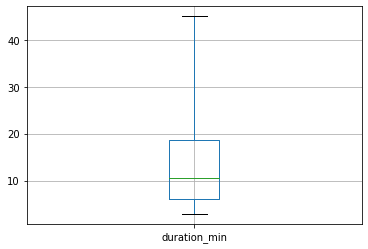

In [30]:
fig, ax = plt.subplots()
box = df.boxplot(column=['duration_min'], ax=ax, showfliers=False, whis=[5,95])
ax.margins(y=0.05)
plt.show()

#### <u>Description</u>:

* A single ride takes on average **16** minutes. 
* The standard deviation is large owing to outliers with long durations. 
* The majority of rides ($90\%$) are between **3** and **45** minutes.

In [31]:
df.groupby('member_casual')['duration_min'].describe(percentiles = [.05, .25, .5, .75, .95])

,count,mean,std,min,5%,25%,50%,75%,95%,max
member_casual,,,,,,,,,,
casual,2265562.00,21.21,25.49,1.00,3.48,7.62,13.25,24.28,66.83,359.88
member,3270225.00,12.40,12.51,1.00,2.60,5.32,9.02,15.47,32.78,359.68


#### <u>Description</u>:

* Casuals ride on average 10 minutes longer than Members.
* for Casuals the majority of rides ($90\%$) are between **4** and **67** minutes.
* for Members the majority of rides ($90\%$) are between **3** and **33** minutes.

### 4.3 Month statistics

How does <span style='background:yellow'>the number of rides</span> and <span style='background:yellow'>mean ride duration</span> differs between <font color=blue>members/casuals</font> for different <font color=blue>months</font>.

In [32]:
month_counts = df.groupby(by='started_at_month')['started_at_month'].count()
month_counts = month_counts.sort_values(ascending=False)
month_counts

started_at_month
Jul    804080
Aug    766972
Jun    752027
Sep    684582
May    621096
Oct    544715
Apr    363313
Nov    329607
Mar    278372
Dec    176787
Feb    112765
Jan    101471
Name: started_at_month, dtype: int64

In [33]:
month_top = list(month_counts[:3].keys().values)
month_bottom = list(month_counts[-3:].keys().values)

print(f'High usage months are: {month_top} and they amount to {100*month_counts[:3].sum()/m:.2f}% of all rides')
print(f'Low usage months are: {month_bottom} and they amount to {100*month_counts[-3:].sum()/m:.2f}% of all rides')

High usage months are: ['Jul', 'Aug', 'Jun'] and they amount to 41.96% of all rides
Low usage months are: ['Dec', 'Feb', 'Jan'] and they amount to 7.06% of all rides


In [34]:
pivot = df.pivot_table(index='started_at_month', columns='member_casual', values='duration_min', aggfunc=['count', 'mean'])
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot = pivot.reindex(month_list)
pivot

count           mean       
member_casual     casual  member casual member
started_at_month                              
Jan                18017   83454  15.96  10.54
Feb                20867   91898  18.55  10.77
Mar                87891  190481  22.82  11.59
Apr               123558  239755  22.26  11.34
May               273945  347151  24.57  13.13
Jun               360377  391650  22.71  13.68
Jul               396237  407843  22.70  13.58
Aug               349983  416989  21.03  13.17
Sep               289416  395166  19.53  12.64
Oct               203607  341108  18.03  11.50
Nov                98084  231523  15.00  10.79
Dec                43580  133207  12.63  10.36

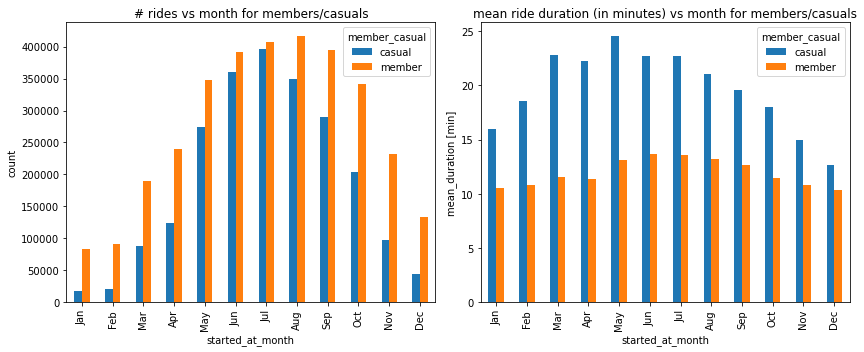

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 5)
ax1 = pivot['count'].plot.bar(stacked=False, ax=ax1)
ax2 = pivot['mean'].plot.bar(stacked=False, ax=ax2)
ax1.set_ylabel('count')
ax2.set_ylabel('mean_duration [min]')
ax1.set_title('# rides vs month for members/casuals')
ax2.set_title('mean ride duration (in minutes) vs month for members/casuals')
fig.tight_layout()

#### <u>Description</u>:

* Most rides are taken in summer and least rides are taken in winter both for Casuals and Members (left Figure).
* Casuals ride on average longer than Members independent of month. The discrepancy is largest in spring and smallest in winter (right Figure).

### 4.3 Weekday statistics

How does <span style='background:yellow'>the number of rides</span> and <span style='background:yellow'>mean ride duration</span> differs between <font color=blue>members/casuals</font> for different <font color=blue>weekdays</font>.

In [36]:
day_counts = df.groupby(by='started_at_weekday')['started_at_weekday'].count()
day_counts = day_counts.sort_values(ascending=False)
day_counts

started_at_weekday
Sa    893943
Th    822429
Fr    783201
We    780235
Tu    764808
Su    757187
Mo    733984
Name: started_at_weekday, dtype: int64

In [37]:
pivot = df.pivot_table(index='started_at_weekday', columns='member_casual', values='duration_min', aggfunc=['count', 'mean'])
weekday_list = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
pivot = pivot.reindex(weekday_list)
pivot

count           mean       
member_casual       casual  member casual member
started_at_weekday                              
Mo                  271024  462960  21.72  11.96
Tu                  257392  507416  18.98  11.75
We                  267926  512309  18.36  11.84
Th                  301982  520447  18.91  12.01
Fr                  326588  456613  19.92  12.21
Sa                  461404  432539  23.76  13.80
Su                  379246  377941  24.21  13.71

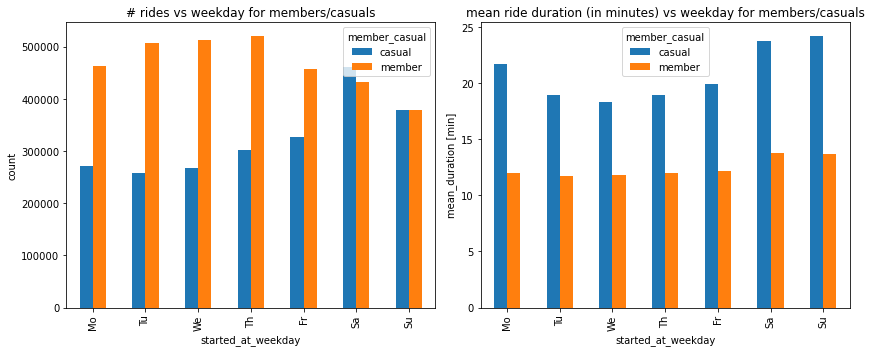

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 5)
ax1 = pivot['count'].plot.bar(stacked=False, ax=ax1)
ax2 = pivot['mean'].plot.bar(stacked=False, ax=ax2)
ax1.set_ylabel('count')
ax2.set_ylabel('mean_duration [min]')
ax1.set_title('# rides vs weekday for members/casuals')
ax2.set_title('mean ride duration (in minutes) vs weekday for members/casuals')
fig.tight_layout()

#### <u>Description</u>:

* Saturday is the most demanding day.
* On weekends, Casuals take roughly as many rides as Members, whereas on working days Members take more rides than Casuals (left Figure).
* Casuals use bikes on average longer than Members independent of the weekday (right Figure).
* During weekends there is a tendency to ride longer both for Casuals and Members (right Figure).

### 4.4 Daytime statistics

How does <span style='background:yellow'>the number of rides</span> and <span style='background:yellow'>mean ride duration</span> differs between <font color=blue>members/casuals</font> for different <font color=blue>daytimes</font>.

In [39]:
daytime_counts = df.groupby(by='started_at_daytime')['started_at_daytime'].count()
daytime_counts = daytime_counts.sort_values(ascending=False)
daytime_counts

started_at_daytime
noon       1858179
evening    1627951
morning    1361813
night       687844
Name: started_at_daytime, dtype: int64

#### <u>Description</u>:

* Noon (12:00 - 17:00) is the most demanding time of day
* Night (21:00 - 5:00) is the least demanding time of day

In [40]:
pivot = df.pivot_table(index='started_at_daytime', columns='member_casual', values='duration_min', aggfunc=['count', 'mean'])
daytime_list = ['morning', 'noon', 'evening', 'night']
pivot = pivot.reindex(daytime_list)
pivot

count            mean       
member_casual       casual   member casual member
started_at_daytime                               
morning             439641   922172  21.04  11.66
noon                810995  1047184  24.07  12.69
evening             664485   963466  19.85  12.93
night               350441   337403  17.36  12.01

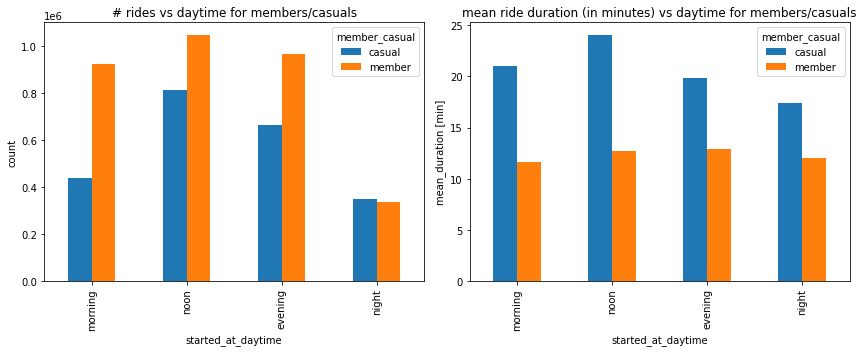

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 5)
ax1 = pivot['count'].plot.bar(stacked=False, ax=ax1)
ax2 = pivot['mean'].plot.bar(stacked=False, ax=ax2)
ax1.set_ylabel('count')
ax2.set_ylabel('mean_duration [min]')
ax1.set_title('# rides vs daytime for members/casuals')
ax2.set_title('mean ride duration (in minutes) vs daytime for members/casuals')
fig.tight_layout()

#### <u>Description</u>:

* Casuals take longer rides than Members no matter when the ride has started during a day (right Figure).
* During night, Members and Casuals are equally represented in terms of number of rides taken, otherwise Members take rides more (left Figure).

### 4.5 Starting Areas

How does <span style='background:yellow'>the number of rides</span> and <span style='background:yellow'>mean ride duration</span> differs between <font color=blue>members/casuals</font> for different <font color=blue>community areas</font>.

In [42]:
### evaluate top 10 popular areas (by number of initiated rides from)
num_areas = 5

pivot = df.pivot_table(index='start_area', columns='member_casual', values='ride_id', aggfunc='count')

### top areas for casuals
pivot = pivot.sort_values(by=['casual'], ascending=False)
top_areas_casual = pivot.iloc[:num_areas].index.to_list()
### top areas for members
pivot = pivot.sort_values(by=['member'], ascending=False)
top_areas_member = pivot.iloc[:num_areas].index.to_list()

### overlap of top areas
def intersection(lst1, lst2):
    lst = [value for value in lst1 if value in lst2]
    return lst

common_areas = intersection(top_areas_casual, top_areas_member)
print(f'Do the top {num_areas} areas coincide for casuals and memebers? {len(common_areas) == num_areas}')

Do the top 5 areas coincide for casuals and memebers? True


In [43]:
pivot = df.pivot_table(index='start_area', columns='member_casual', values='duration_min', aggfunc=['count', 'mean'])
pivot = pivot.sort_values(by=[('count', 'casual')], ascending=False)
pivot = pivot.iloc[:num_areas]
pivot

count           mean       
member_casual    casual  member casual member
start_area                                   
NEAR NORTH SIDE  421648  580267  23.01  12.37
LINCOLN PARK     315801  406349  19.21  12.26
LOOP             280351  315556  28.75  12.94
LAKE VIEW        246392  339865  17.61  12.02
NEAR WEST SIDE   170642  426031  17.18  10.83

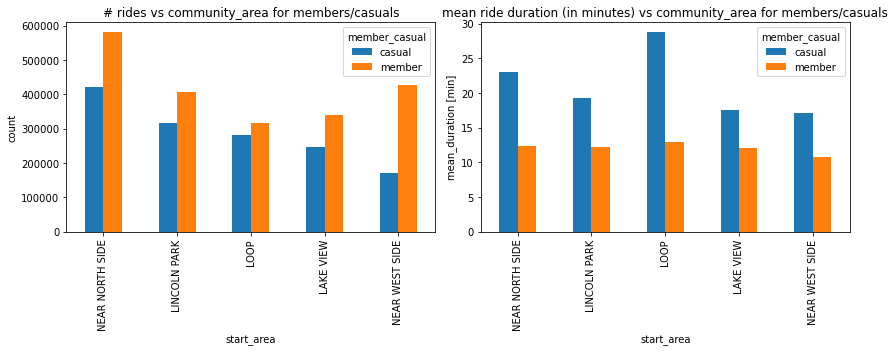

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 5)
ax1 = pivot['count'].plot.bar(stacked=False, ax=ax1)
ax2 = pivot['mean'].plot.bar(stacked=False, ax=ax2)
ax1.set_ylabel('count')
ax2.set_ylabel('mean_duration [min]')
ax1.set_title('# rides vs community_area for members/casuals')
ax2.set_title('mean ride duration (in minutes) vs community_area for members/casuals')
fig.tight_layout()

#### <u>Description</u>:

* For the top 5 areas, Members initiate rides more frequently than Casuals.
* For the top 5 areas, Casuals take rides for longer than Members.

In [45]:
### areas where casuals initiate rides more often than members
pivot = df.pivot_table(index='start_area', columns='member_casual', values='duration_min', aggfunc='count')
pivot = pivot[pivot['casual'] > pivot['member']]
pivot.sort_values(by=['casual'], ascending=False).head(10)

member_casual,casual,member
start_area,,
NEAR SOUTH SIDE,80688,64344
BELMONT CRAGIN,9852,9530
AUSTIN,6781,4536
PORTAGE PARK,5803,5177
HERMOSA,4713,3759
GAGE PARK,4380,1943
NORTH LAWNDALE,3816,2811
DUNNING,3533,2789
NEW CITY,3420,2642


<input type="checkbox" disabled  checked/> A summary of your analysis

## 5. Share

Key findings of the above analysis:

* <font color=green>Casuals</font> **favour electric bikes over classic bikes**, which is the opposite for <font color=green>Members</font> (see 4.1).
* <font color=green>Casuals</font> rent bikes **less frequently** than <font color=green>Members</font> independet of month (see 4.2).
* <font color=green>Casuals</font> rent bikes **less frequently** than <font color=green>Members</font> on workdays (see 4.3) and at morning-to-evening (see 4.4).
* <font color=green>Casuals</font> rent bikes **for a longer duration** than <font color=green>Members</font> independet of month, dayweek or daytime (see 4.2-4.4).
* In **top 5 community areas** judged by total rides, <font color=green>Casuals</font> rent bikes **less frequently** than <font color=green>Members</font> (see 4.5).
* We created a **list of community areas**, where <font color=green>Casuals</font> rent bikes **more frequently** than <font color=green>Members</font>.

<input type="checkbox" disabled  checked/> Supporting visualizations and key findings

## 6. Act

Top three recommendations:

* <font color=green>Casuals</font> use **docked** bikes and ride them on average for longest. Couple docked bikes to annual memberships?
* Introduce **discounts** for <font color=green>Members</font> which **increase with the ride duration**.
* Launch a **summer** marketing campaign on **weekends** at **noon-to-evening** time in **top areas** where <font color=green>Casuals</font> launch rides most often to achieve the largest impact.

Furthermore:

* Find out why do <font color=green>Casuals</font> rent bikes **less frequently**? Do <font color=green>Casuals</font> use a bike for a special occasion or activity, rather than a regular form of transportation? Are there troubles with availability?
* Find out what are the current **benefits/drawbacks of annual membership as compared to single-ride/full-day passes**? Do <font color=green>Members</font> pay less/nothing for short rides? Is there a fee for launching a ride? How do the rates differ between <font color=green>Casuals</font> and <font color=green>Members</font>?

<input type="checkbox" disabled  checked/> Your top three recommendations based on your analysis